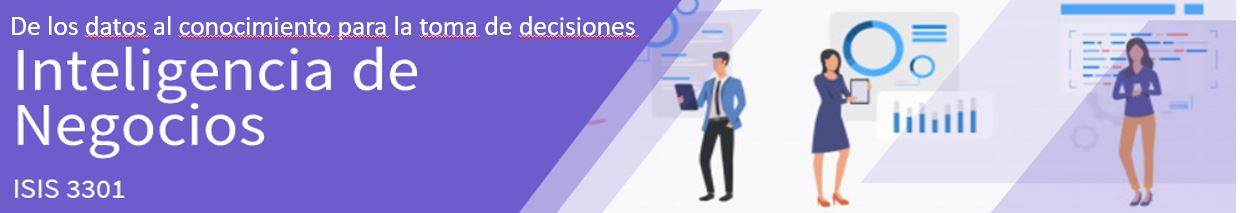

ESTUDIANTES:
-Juan Felipe Garcia
-Samuel Freire
-Lucciano Franco

# 1 Carga de librerias

In [2]:
%pip install scikit-learn-extra

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import scipy.stats as stats


# 2. Carga de Datos

In [4]:
df_pc=pd.read_csv('./202320_Laboratorio 2 - Regresión_data_laptop_data_train.csv',sep=",", encoding = "ISO-8859-1")

# 3.Entendimiento de los datos

In [5]:
df_pc.shape

(1216, 14)

In [6]:
df_pc.head()

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,704,Lenovo,Notebook,4,1.90,10.084809,0,0,100.454670,Intel Core i3,500.0,0,Intel,Others
1,712,Dell,Notebook,8,1.98,10.563111,0,0,141.211998,Intel Core i5,1000.0,0,Intel,Others
2,1072,HP,Ultrabook,8,1.26,11.064804,0,0,176.232574,Intel Core i5,0.0,256,Intel,Windows
3,370,Asus,2 in 1 Convertible,12,2.26,10.977717,1,0,141.211998,Intel Core i7,2000.0,512,Nvidia,Windows
4,207,Dell,Ultrabook,8,1.21,11.550633,1,1,331.264236,Intel Core i7,0.0,256,Intel,Windows


In [7]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1216 non-null   int64  
 1   Company      1216 non-null   object 
 2   TypeName     1216 non-null   object 
 3   Ram          1216 non-null   int64  
 4   Weight       1193 non-null   float64
 5   Price        1201 non-null   float64
 6   TouchScreen  1216 non-null   int64  
 7   Ips          1216 non-null   int64  
 8   Ppi          1204 non-null   float64
 9   Cpu_brand    1216 non-null   object 
 10  HDD          1200 non-null   float64
 11  SSD          1216 non-null   int64  
 12  Gpu_brand    1216 non-null   object 
 13  Os           1216 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 133.1+ KB


In [8]:
df_pc.describe()

,id,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1216.000000,1216.000000,1193.000000,1201.000000,1216.000000,1216.000000,1204.000000,1200.000000,1216.000000
mean,637.925164,8.458882,2.401572,13.114402,0.145559,0.285362,183.830716,441.218800,187.529605
std,367.482876,5.094332,4.844791,28.659102,0.352809,0.451772,449.708876,927.052855,186.902926
min,0.000000,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,319.750000,4.000000,1.500000,10.403650,0.000000,0.000000,127.335675,0.000000,0.000000
50%,638.500000,8.000000,2.040000,10.882316,0.000000,0.000000,141.211998,0.000000,256.000000
75%,954.250000,8.000000,2.320000,11.288115,0.000000,1.000000,157.350512,1000.000000,256.000000
max,1272.000000,64.000000,97.729949,499.766079,1.000000,1.000000,7328.468865,24127.543112,1024.000000


In [9]:
df_pc.dtypes

id               int64
Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
Cpu_brand       object
HDD            float64
SSD              int64
Gpu_brand       object
Os              object
dtype: object

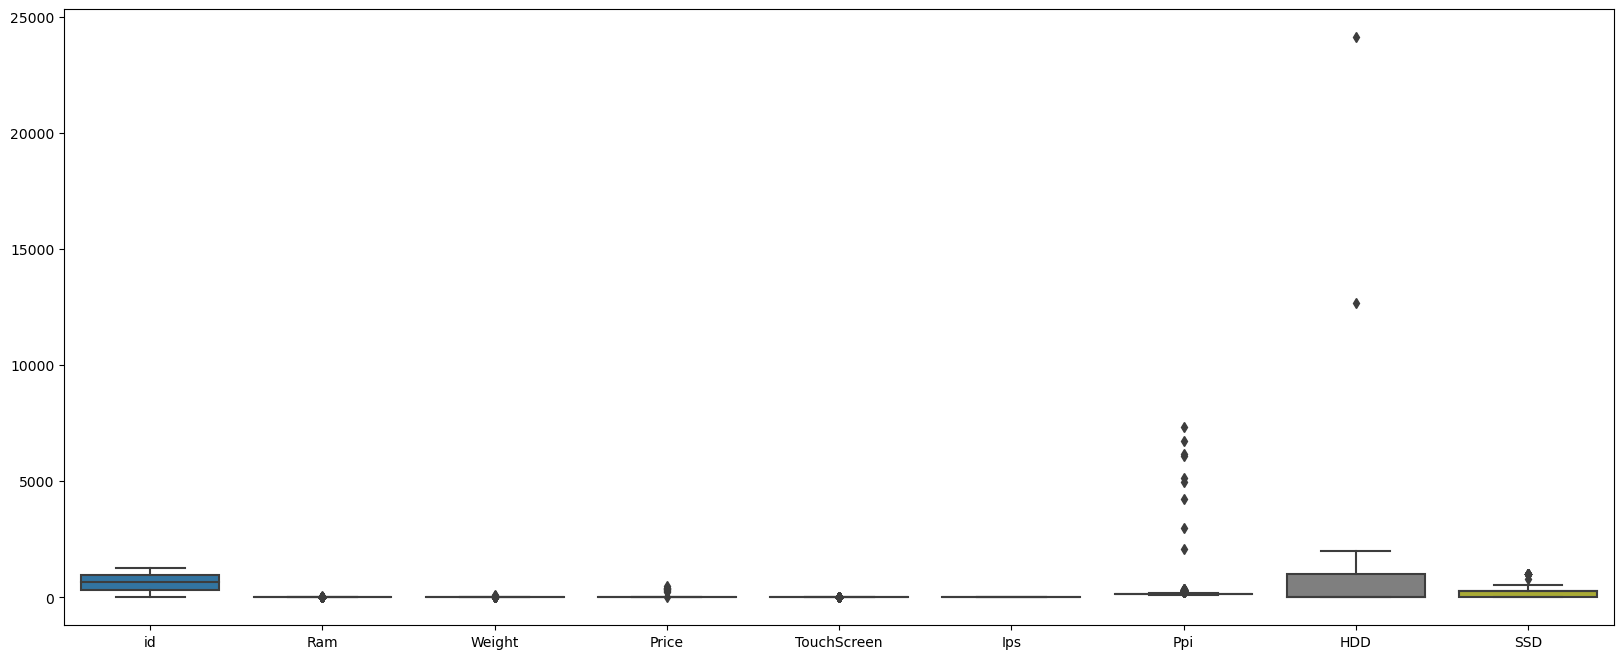

In [10]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_pc, orient="v")

Puedes ver las variables con dominios similares para entenderlas mejor. 
En este caso podrías quitar Speed_limit.

In [11]:
name_cols_float = df_pc.select_dtypes(include = ['float']).columns
name_cols_int = df_pc.select_dtypes(include = ['int64']).columns
name_cols_int

Index(['id', 'Ram', 'TouchScreen', 'Ips', 'SSD'], dtype='object')

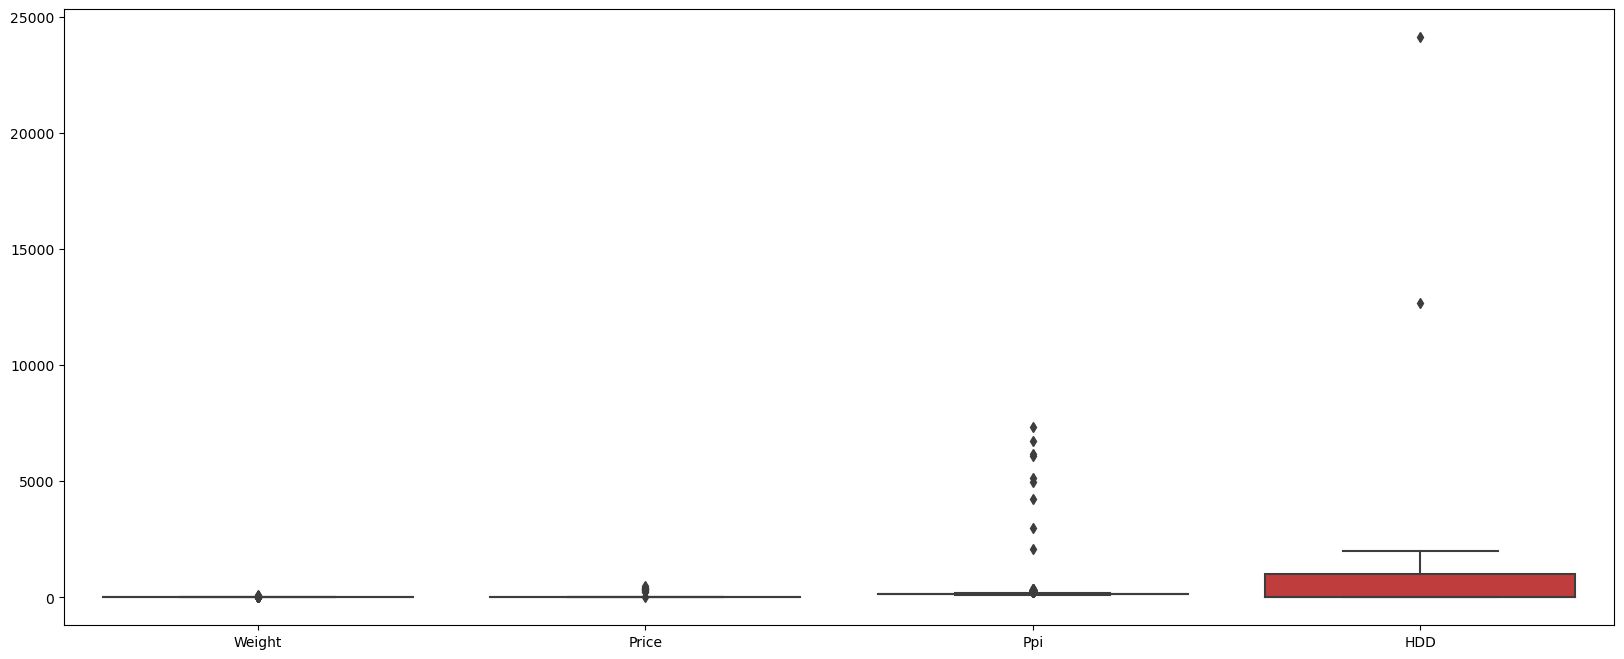

In [12]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_pc[name_cols_float], orient="v")

En el anterior grafico se ve que hay datos en numVotes que son muy altos esto quiere decir que el numero de votos que obtuvo esta pelicula fue muy alta

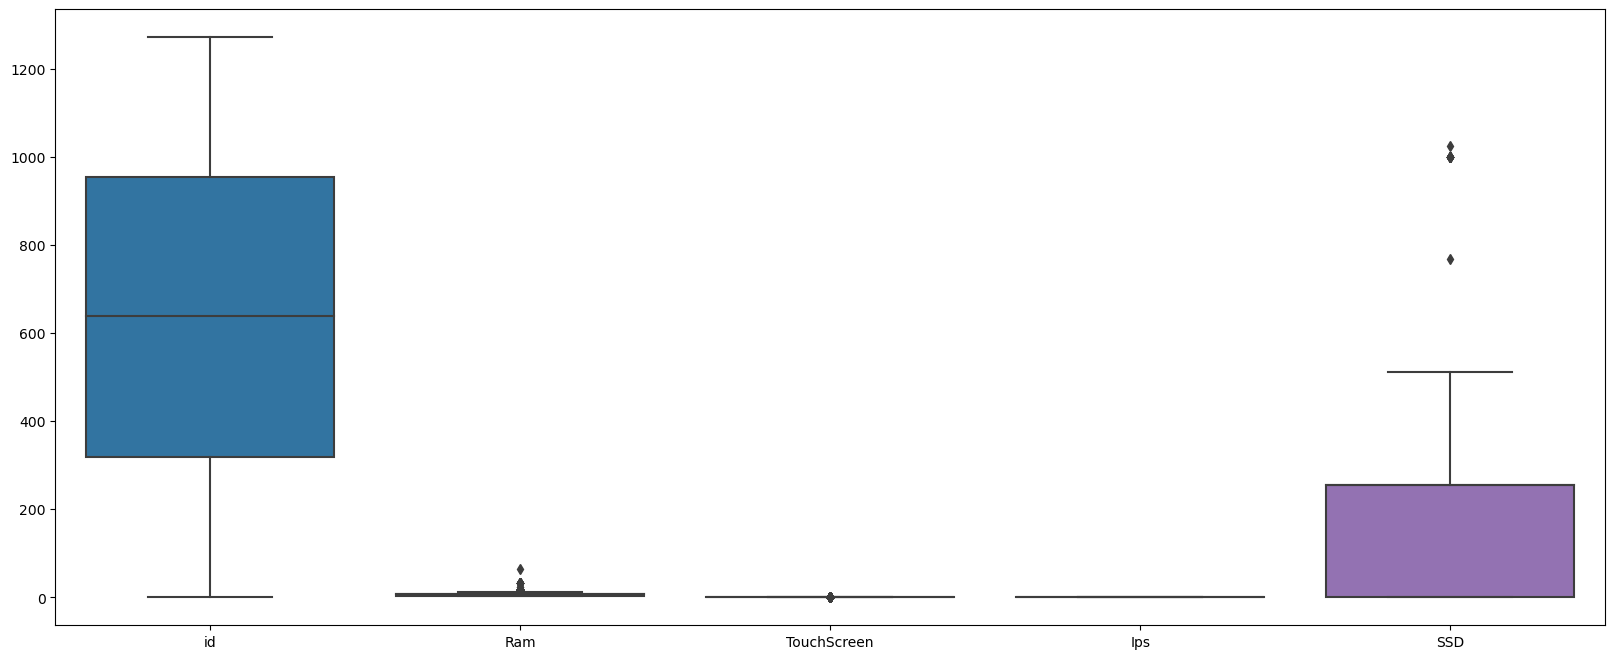

In [13]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_pc[name_cols_int], orient="v")

In [14]:
name_cols_non_number = df_pc.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'], dtype='object')

In [15]:
df_pc[name_cols_non_number].describe()

,Company,TypeName,Cpu_brand,Gpu_brand,Os
count,1216,1216,1216,1216,1216
unique,19,13,5,9,3
top,Lenovo,Notebook,Intel Core i7,Intel,Windows
freq,281,656,497,662,1049


In [16]:
# Revisamos en detalle el contenido de la columna Time
df_pc.Ram.value_counts()

8     583
4     350
16    192
6      33
12     25
32     16
2      14
24      2
64      1
Name: Ram, dtype: int64

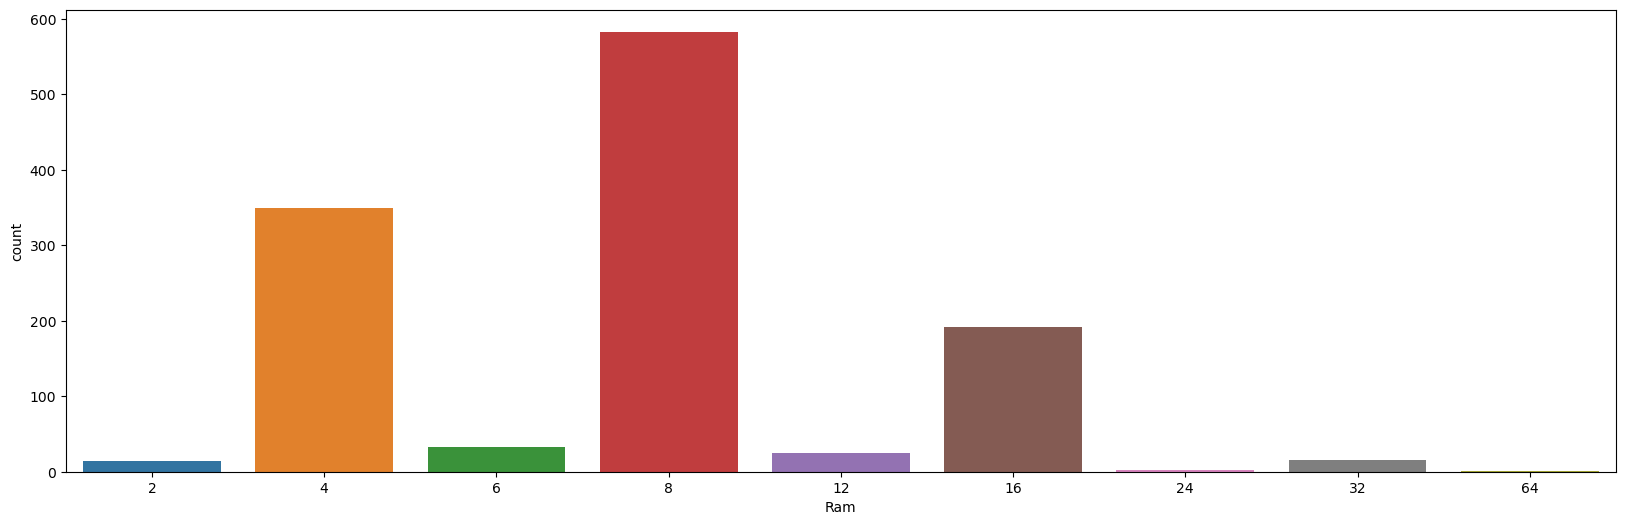

In [17]:
plt.figure(figsize=(20, 6))  
ax = sns.countplot(x='Ram', data=df_pc)

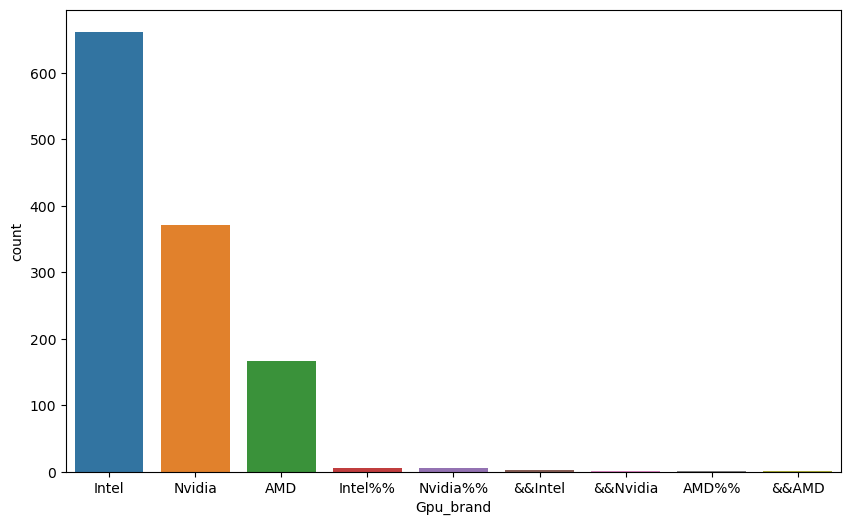

In [18]:
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='Gpu_brand', data=df_pc)

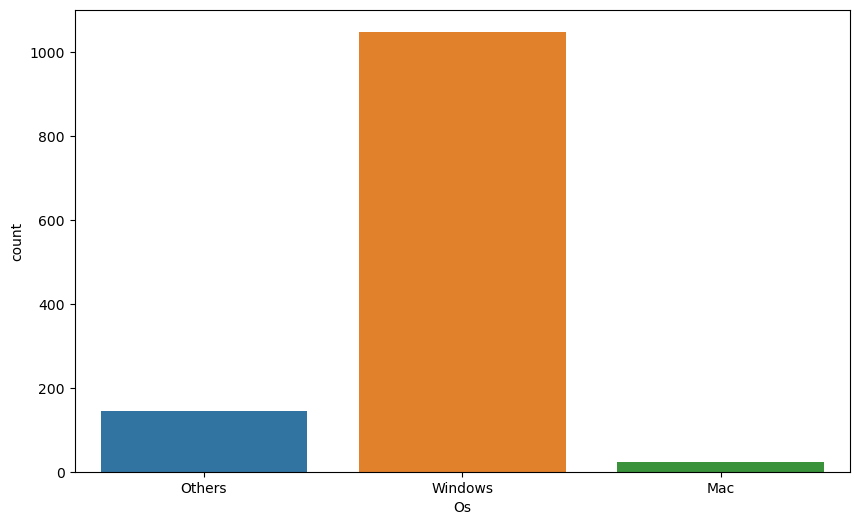

In [19]:
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='Os', data=df_pc)

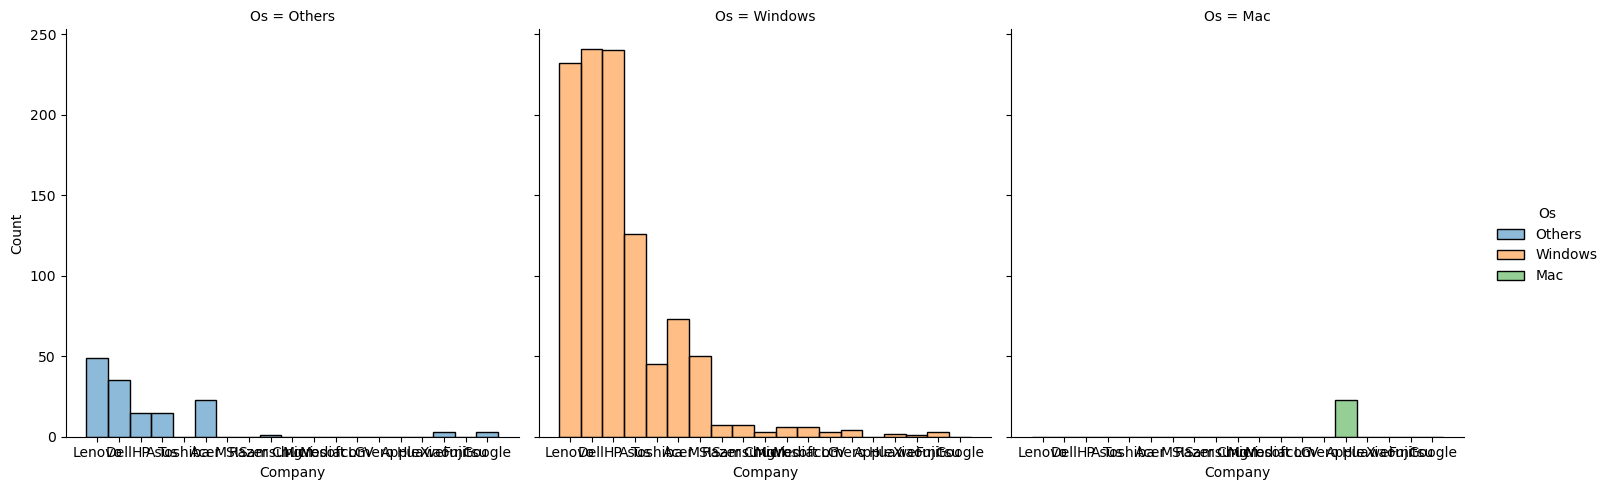

In [20]:
#Observar las distribuciones de "Accident_Severity" por cada valor de Time
sns.displot(data=df_pc, x="Company", hue="Os", col="Os")

In [21]:
df_pc

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,704,Lenovo,Notebook,4,1.90,10.084809,0,0,100.454670,Intel Core i3,500.0,0,Intel,Others
1,712,Dell,Notebook,8,1.98,10.563111,0,0,141.211998,Intel Core i5,1000.0,0,Intel,Others
2,1072,HP,Ultrabook,8,1.26,11.064804,0,0,176.232574,Intel Core i5,0.0,256,Intel,Windows
3,370,Asus,2 in 1 Convertible,12,2.26,10.977717,1,0,141.211998,Intel Core i7,2000.0,512,Nvidia,Windows
4,207,Dell,Ultrabook,8,1.21,11.550633,1,1,331.264236,Intel Core i7,0.0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1039,HP,Notebook,8,1.64,10.893771,0,0,157.350512,Intel Core i5,0.0,256,Intel,Windows
1212,1090,Dell,Notebook,4,2.20,9.950617,0,0,100.454670,Other Intel Processor,500.0,0,Intel,Others
1213,1125,Lenovo,2 in 1 Convertible,8,1.80,11.395541,1,1,157.350512,Intel Core i7,0.0,256,Intel,Windows
1214,856,Asus,Notebook,4,2.00,10.082584,0,0,100.454670,Other Intel Processor,1000.0,0,Intel,Windows


In [22]:
#Supongamos que los expertos quieren ver relaciones entre las variables: "Time","Number_of_Casualties","Day_of_Week","Speed_limit", "Light_Conditions"
cols_select=["Price","Ram","Weight", "SSD"]
df_pc_cols_sels=df_pc[cols_select].copy()

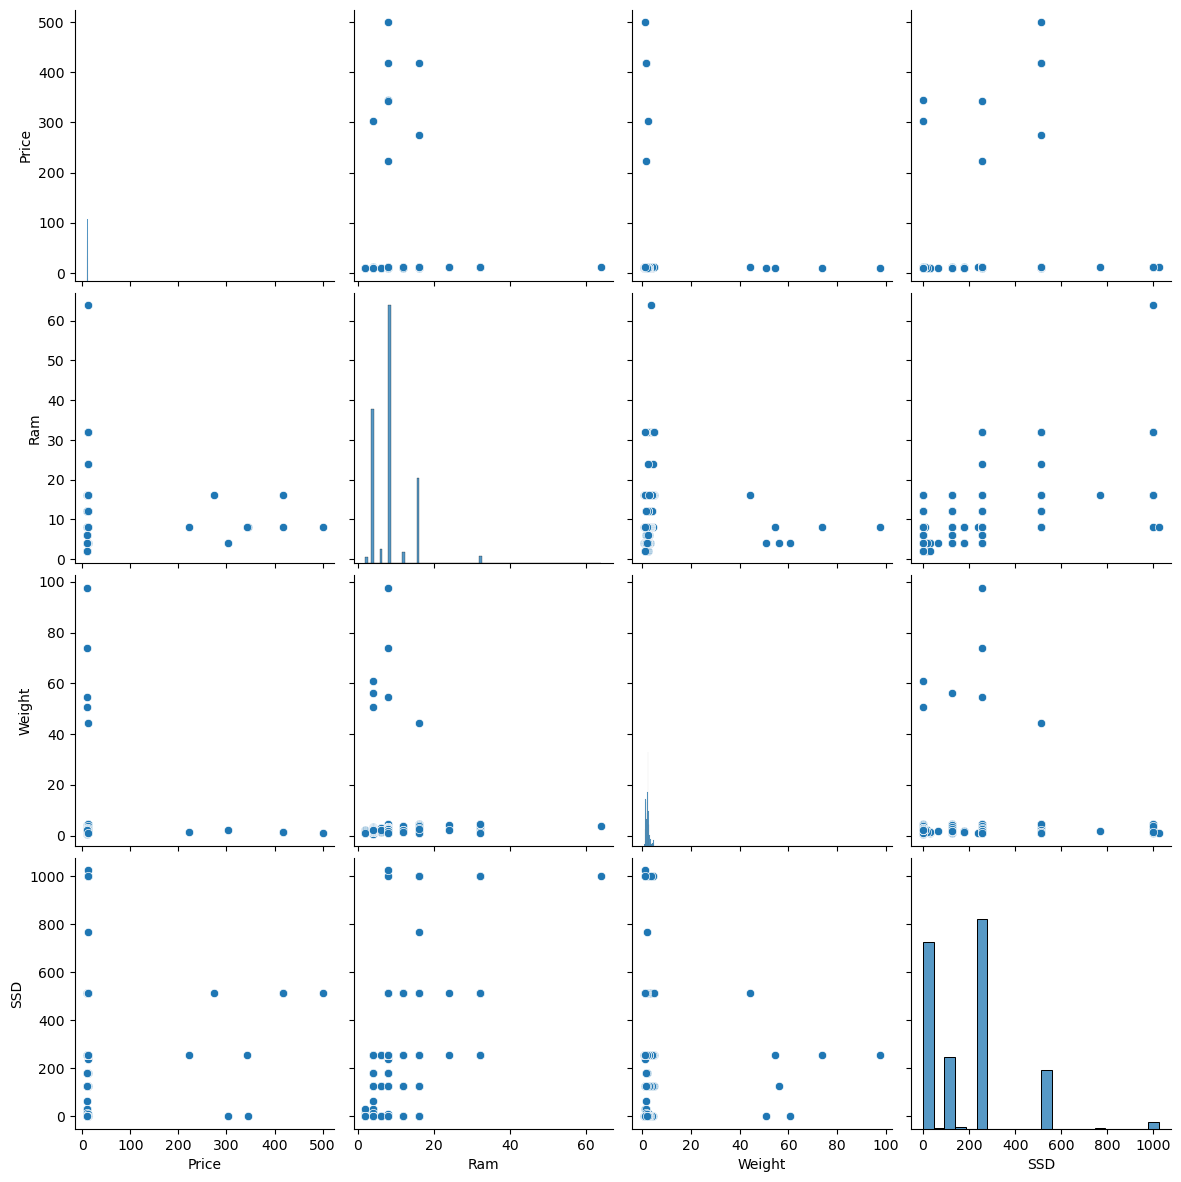

In [23]:
#Vámos las relaciones entre todas las variables numércias
sns.pairplot(df_pc_cols_sels, height=3,kind='scatter')

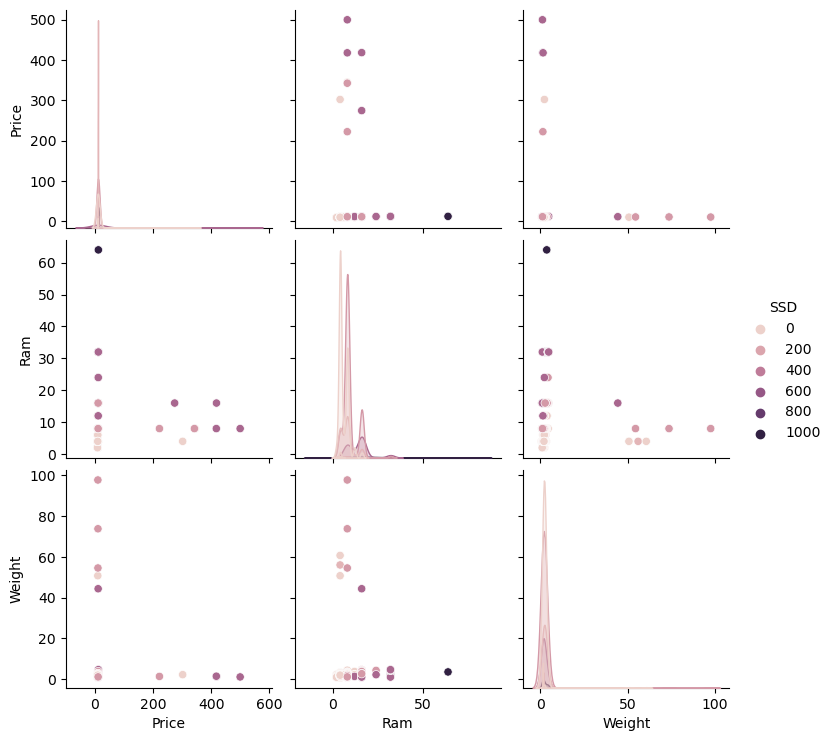

In [24]:
# En esta gráfica van a ver las relaciones entre Time y las otras variables numéricas
sns.pairplot(data=df_pc_cols_sels, hue="SSD")

### 3.1 Entendimiento de los datos

**Análisis** 
1. Id no aparece nombrada en el diccionario, debido a esto en vez puede ser candidata a ser eliminada.
2. Existen columnas que no tienen el tipo apropiado por lo que tienen que ser revisadas y cambiadas.
3. Id no aparece nombrada en el diccionario, debido a esto en vez puede ser candidata a ser eliminada.




La columna describe deberia ser int no deberia tener ningun float por lo que al hacer describe en esta columna nos damos cuenta que el maximo es un numero float por lo que es necesario eliminar estos datos o cambiarlos por un valor estandar

In [25]:
df_pc["HDD"].describe()

count     1200.000000
mean       441.218800
std        927.052855
min          0.000000
25%          0.000000
50%          0.000000
75%       1000.000000
max      24127.543112
Name: HDD, dtype: float64

In [26]:
df_pc.describe()

,id,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1216.000000,1216.000000,1193.000000,1201.000000,1216.000000,1216.000000,1204.000000,1200.000000,1216.000000
mean,637.925164,8.458882,2.401572,13.114402,0.145559,0.285362,183.830716,441.218800,187.529605
std,367.482876,5.094332,4.844791,28.659102,0.352809,0.451772,449.708876,927.052855,186.902926
min,0.000000,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,319.750000,4.000000,1.500000,10.403650,0.000000,0.000000,127.335675,0.000000,0.000000
50%,638.500000,8.000000,2.040000,10.882316,0.000000,0.000000,141.211998,0.000000,256.000000
75%,954.250000,8.000000,2.320000,11.288115,0.000000,1.000000,157.350512,1000.000000,256.000000
max,1272.000000,64.000000,97.729949,499.766079,1.000000,1.000000,7328.468865,24127.543112,1024.000000


In [27]:
#Consulto una muestra de datos para analizarlos mejor
df_pc.sample(15)

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
529,61,Dell,Ultrabook,8,1.70,10.754346,0,0,157.350512,Intel Core i5,0.0,256,Intel,Windows
937,125,HP,Notebook,4,1.86,9.532389,0,0,100.454670,Other Intel Processor,500.0,0,Intel,Others
966,1045,HP,Notebook,8,1.84,11.626843,0,0,141.211998,Intel Core i5,500.0,256,Intel,Windows
450,91,Acer,Notebook,8,2.20,10.510802,0,0,141.211998,Intel Core i7,1000.0,0,Nvidia,Windows
1193,21,Lenovo,Gaming,8,2.50,10.882316,0,1,141.211998,Intel Core i5,1000.0,128,Nvidia,Windows
1071,1242,Dell,2 in 1 Convertible,16,2.77,11.470547,1,0,127.335675,Intel Core i7,0.0,512,Nvidia,Windows
141,672,Lenovo,2 in 1 Convertible,8,NaN,10.916751,1,1,165.632118,Intel Core i5,0.0,256,Intel,Windows
240,1056,HP,&&Notebook,4,1.96,10.188167,0,0,100.454670,Intel Core i5,500.0,0,Intel%%,Others
485,962,Acer,Notebook,12,2.40,10.892276,0,0,141.211998,Intel Core i5,1000.0,128,Nvidia,Windows
1118,1012,HP,Notebook,4,1.48,11.347050,0,0,157.350512,Intel Core i5,0.0,256,Intel,Windows


In [28]:
df_pc["Cpu_brand"].value_counts()

Intel Core i7            497
Intel Core i5            403
Other Intel Processor    131
Intel Core i3            127
AMD Processor             58
Name: Cpu_brand, dtype: int64

### 3.2. Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.
En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación. Esta actividad la hicimos en el notebook de entendimiento de datos y acá retomaremos los elementos más importantes, para ilustrar el concepto.

### 3.2.1 Completitud - Análisis de valores nulos o vacíos

In [29]:
# Cálculo de porcentaje de valores nulos por columna
((df_pc.isnull().sum()/df_pc.shape[0])).sort_values(ascending=False)

Weight         0.018914
HDD            0.013158
Price          0.012336
Ppi            0.009868
id             0.000000
Company        0.000000
TypeName       0.000000
Ram            0.000000
TouchScreen    0.000000
Ips            0.000000
Cpu_brand      0.000000
SSD            0.000000
Gpu_brand      0.000000
Os             0.000000
dtype: float64

Como se ve en la anterior no hay ninguna columna completamente en null pero si hay columnas que no aparecen en el diccionario por lo que estas se toman como candidatas para ser eliminadas.

Hay varias columnas que tienen un 0.000134 porciento de datos nulos por lo que al ser un mismo porcentaje se sospecha que pueda ser una misma fila, y del mismo modo al ser un numero tan pequeño se considerara en rellenar la informacion con algun valor constante como puede ser la media por ejemplo.


### 3.2.2 Unicidad

In [30]:
df_pc.duplicated(keep = False).sum()

10

In [31]:

df_pc["id"].duplicated(keep = False).sum()


10

En este caso existen valores duplicados, en tconst existen valores duplicados lo cual no tendria que suceder ya que este es el ID de cada uno de los datos por lo que es un claro candidato a ser eliminado. 

Aparte de esto existen 6 filas duplicadas por lo que estas seran candidatas para se eliminadas al ser un numero muy pequeño.

### 3.2.3 Consistencia

In [32]:
df_pc.dtypes

id               int64
Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
Cpu_brand       object
HDD            float64
SSD              int64
Gpu_brand       object
Os              object
dtype: object

Existen columnas que tienen tipo incorrecto como lo son TouchScreen e Ips que deberian ser booleanos y tambien a esto se le suma HDD que deberia ser entero pero aparece como float

In [33]:
df_pc["TouchScreen"].describe()

count    1216.000000
mean        0.145559
std         0.352809
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TouchScreen, dtype: float64

Ambas columnas son 0 o 1 por lo que se puede hacer una transicion de enteros a booleanos bastante sencilla 

In [34]:

df_pc["Gpu_brand"].value_counts()

Intel       662
Nvidia      371
AMD         166
Intel%%       6
Nvidia%%      6
&&Intel       2
&&Nvidia      1
AMD%%         1
&&AMD         1
Name: Gpu_brand, dtype: int64

In [35]:
df_pc['Gpu_brand'] = df_pc['Gpu_brand'].str.replace('&&', '').str.replace('%%', '')

In [36]:
df_pc["Gpu_brand"].value_counts()

Intel     670
Nvidia    378
AMD       168
Name: Gpu_brand, dtype: int64

Las marcas de la Gpu_brand estan mal por lo que tienen que ser ajustadas, unicamente deberian existir 3 marcas

In [37]:
df_pc["TypeName"].value_counts()

Notebook                656
Gaming                  189
Ultrabook               187
2 in 1 Convertible      109
Workstation              29
Netbook                  21
Notebook%%                9
&&Notebook                5
Gaming%%                  4
&&Gaming                  3
&&2 in 1 Convertible      2
2 in 1 Convertible%%      1
&&Ultrabook               1
Name: TypeName, dtype: int64

Del mismo modo sucede con TypeName por lo que esto tambien tiene que ser ajustado

### 3.2.4 Validez

En este caso podemos revisar que la columna is Adult en su defecto no aporta nigunga informacion para el analsis

En eset caso vemos que el maximo valor de la columna average Rating esta porfuera de lo que se menciono en elñ diccionario asi qeu en este caso seria invalido usar este valor

En este caso vemos qeu nuevamente toda la columna dde lenguaje sucede lo mismo no aporta nada al analsisi

En este caso vemos qeu nuevamente toda la columna dde lenguaje sucede lo mismo no aporta nada al analsis

Existen valores en averageRating que no funcionan del modo que deberian ya que el rango deberia ser de 0 a 10 con decimales y hay valores que se pasan de este valor, por lo que esto tendra que cambiarse mas adelante. Por ejemplo como se ve arriba el maximo valor es 92. Aparte de esto la validez de los datos de isAdult es bastante poca ya que todos los valores son el mismo. Algo similar sucede en el caso de la columa language y originaltype

### 3.3 Manipulacion de datos

### 3.3.1 Prepara datos


Hay filas con atributos que no coinciden con el tipo de diccionario debido a esto deben ser cambiados


En este caso los datos son tconst y runtimeMinutes 

Existen valores NaN en la columna de peso por lo que para mayor facilidad en el futuro se decidio remplazar estos valores con la media de la columna

In [38]:
promedio = df_pc['Weight'].mean()
df_pc['Weight'].fillna(promedio, inplace=True)
promedio = df_pc['Ppi'].mean()
df_pc['Ppi'].fillna(promedio, inplace=True)
promedio = df_pc['HDD'].mean()
df_pc['HDD'].fillna(promedio, inplace=True)

In [39]:
promedio = df_pc['Price'].mean()
df_pc['Price'].fillna(promedio, inplace=True)

In [40]:
hay_nan = df_pc['HDD'].isna().any()

if hay_nan:
    print("Hay valores NaN en la columna 'Weight'.")
else:
    print("No hay valores NaN en la columna 'Weight'.")

No hay valores NaN en la columna 'Weight'.


Las razon por la que las columnas se quitaron es porque no tenian una utilidad clara o porque no estaban en el diccionario(o ambas):

"#": no se aclara que es lo que hace la columnas y se puede pensar que son numeros sueltos sin un sentido  claro.

"index": mismo razonamiento que "#"
    
"isAdult": isAdult puede que fuese relevante si no todos los valores fueran 0, se cree que hay valores que son distintos a 0 realmente por lo se cree que la columna esta mal y de igual modo si esta correcta es irrelevante para el analisis de datos

"isOriginalTitle": mismo razonamiento que isAdult

"language": del mismo modo que isAdult todos los valores son iguales por lo que no se considera relevante para el analisis de datos.

"Attribute": Se hizo el mismo razonamiento que para isAdult, todos los datos son \N por lo que se considera que no es relevante para el analisis de datos

In [41]:
df_pc['Ppi'] = df_pc['Ppi'].clip(lower=0, upper=400)
df_pc['Price'] = df_pc['Price'].clip(lower=0, upper=14)
df_pc['Ram'] = df_pc['Ram'].clip(lower=0, upper=32)
df_pc['Weight'] = df_pc['Weight'].clip(lower=0.1, upper=7)
df_pc['HDD'] = df_pc['HDD'].clip(lower=0, upper=4000)


In [42]:
features= ["Weight","Price","Ppi","HDD","Ram"]

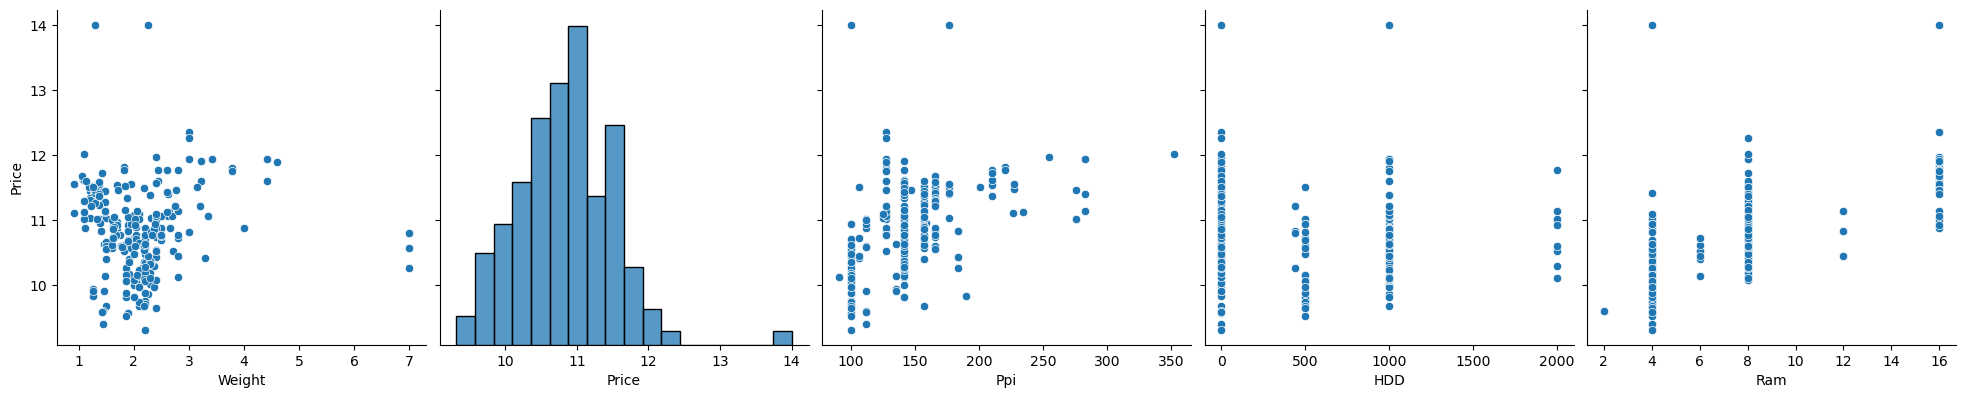

In [43]:
sns.pairplot(df_pc.sample(frac=0.2),height=4,y_vars="Price",x_vars=features)

Quitar datos duplicados de id:

In [44]:
df_pc["id"].duplicated(keep = False).sum()

10

In [45]:
df_pc.drop_duplicates(subset=['id'], inplace=True)

In [46]:
df_pc.duplicated(subset=["id"]).sum()

0

In [47]:
df_pc


,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,704,Lenovo,Notebook,4,1.90,10.084809,0,0,100.454670,Intel Core i3,500.0,0,Intel,Others
1,712,Dell,Notebook,8,1.98,10.563111,0,0,141.211998,Intel Core i5,1000.0,0,Intel,Others
2,1072,HP,Ultrabook,8,1.26,11.064804,0,0,176.232574,Intel Core i5,0.0,256,Intel,Windows
3,370,Asus,2 in 1 Convertible,12,2.26,10.977717,1,0,141.211998,Intel Core i7,2000.0,512,Nvidia,Windows
4,207,Dell,Ultrabook,8,1.21,11.550633,1,1,331.264236,Intel Core i7,0.0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1039,HP,Notebook,8,1.64,10.893771,0,0,157.350512,Intel Core i5,0.0,256,Intel,Windows
1212,1090,Dell,Notebook,4,2.20,9.950617,0,0,100.454670,Other Intel Processor,500.0,0,Intel,Others
1213,1125,Lenovo,2 in 1 Convertible,8,1.80,11.395541,1,1,157.350512,Intel Core i7,0.0,256,Intel,Windows
1214,856,Asus,Notebook,4,2.00,10.082584,0,0,100.454670,Other Intel Processor,1000.0,0,Intel,Windows


Quitar NaN

# 4. Pipelines

In [48]:
features = ["Gpu_brand", "Weight","Ram","Ppi","HDD"]

C:\Users\Samue\AppData\Local\Temp\ipykernel_28504\3395864857.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_pc[features].corr(), cmap = 'vlag', vmin = -1, vmax = 1)


<Axes: >

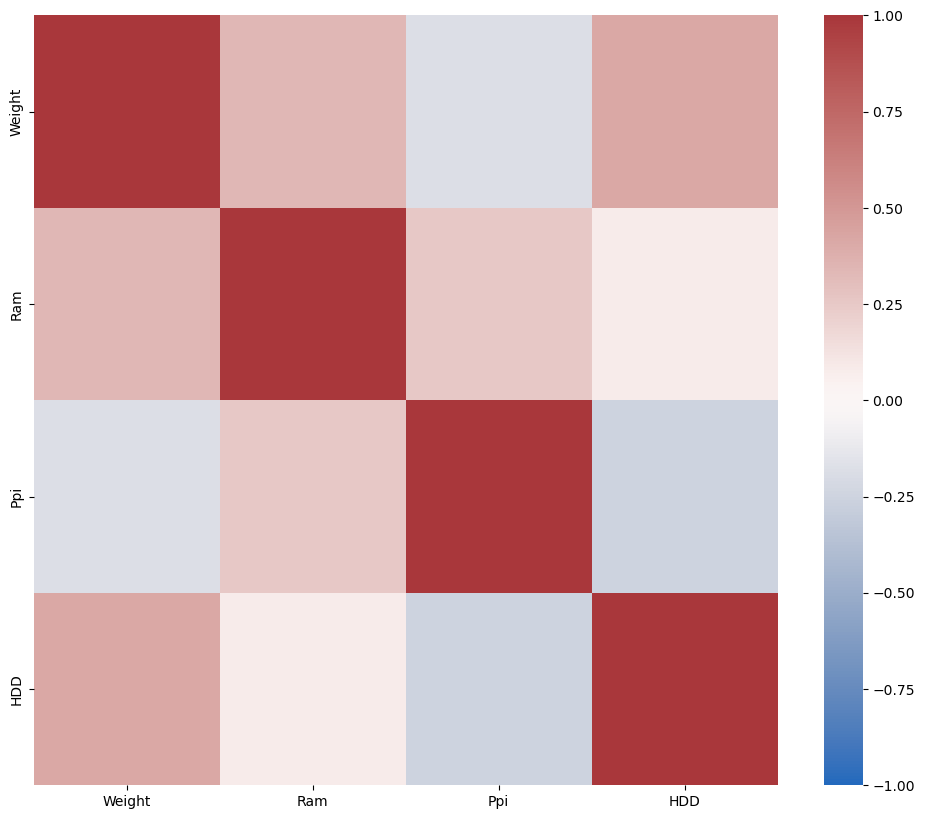

In [49]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_pc[features].corr(), cmap = 'vlag', vmin = -1, vmax = 1)

In [50]:
df_pc["Gpu_brand"].value_counts()

Intel     668
Nvidia    376
AMD       166
Name: Gpu_brand, dtype: int64

In [51]:
# Define un diccionario de mapeo de valores originales a nuevos valores
mapeo_Gpu= {
    'Intel': 0,
    'Nvidia': 0.5,
    'AMD': 1,
    
}
# Reemplaza los valores en la columna 'Company' con los nuevos valores
df_pc['Gpu_brand'] = df_pc['Gpu_brand'].replace(mapeo_Gpu)

df_pc

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,704,Lenovo,Notebook,4,1.90,10.084809,0,0,100.454670,Intel Core i3,500.0,0,0.0,Others
1,712,Dell,Notebook,8,1.98,10.563111,0,0,141.211998,Intel Core i5,1000.0,0,0.0,Others
2,1072,HP,Ultrabook,8,1.26,11.064804,0,0,176.232574,Intel Core i5,0.0,256,0.0,Windows
3,370,Asus,2 in 1 Convertible,12,2.26,10.977717,1,0,141.211998,Intel Core i7,2000.0,512,0.5,Windows
4,207,Dell,Ultrabook,8,1.21,11.550633,1,1,331.264236,Intel Core i7,0.0,256,0.0,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1039,HP,Notebook,8,1.64,10.893771,0,0,157.350512,Intel Core i5,0.0,256,0.0,Windows
1212,1090,Dell,Notebook,4,2.20,9.950617,0,0,100.454670,Other Intel Processor,500.0,0,0.0,Others
1213,1125,Lenovo,2 in 1 Convertible,8,1.80,11.395541,1,1,157.350512,Intel Core i7,0.0,256,0.0,Windows
1214,856,Asus,Notebook,4,2.00,10.082584,0,0,100.454670,Other Intel Processor,1000.0,0,0.0,Windows


In [52]:
# Calcular el valor mínimo y máximo de cada columna
columnas_numericas = ["Weight","Ppi"]
minimo = df_pc[columnas_numericas].min()
maximo = df_pc[columnas_numericas].max()

# Normalizar las columnas
df_pc[columnas_numericas] = (df_pc[columnas_numericas] - minimo) / (maximo - minimo)
df_pc



,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,704,Lenovo,Notebook,4,0.191759,10.084809,0,0,0.031903,Intel Core i3,500.0,0,0.0,Others
1,712,Dell,Notebook,8,0.204437,10.563111,0,0,0.163626,Intel Core i5,1000.0,0,0.0,Others
2,1072,HP,Ultrabook,8,0.090333,11.064804,0,0,0.276809,Intel Core i5,0.0,256,0.0,Windows
3,370,Asus,2 in 1 Convertible,12,0.248811,10.977717,1,0,0.163626,Intel Core i7,2000.0,512,0.5,Windows
4,207,Dell,Ultrabook,8,0.082409,11.550633,1,1,0.777854,Intel Core i7,0.0,256,0.0,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1039,HP,Notebook,8,0.150555,10.893771,0,0,0.215784,Intel Core i5,0.0,256,0.0,Windows
1212,1090,Dell,Notebook,4,0.239303,9.950617,0,0,0.031903,Other Intel Processor,500.0,0,0.0,Others
1213,1125,Lenovo,2 in 1 Convertible,8,0.175911,11.395541,1,1,0.215784,Intel Core i7,0.0,256,0.0,Windows
1214,856,Asus,Notebook,4,0.207607,10.082584,0,0,0.031903,Other Intel Processor,1000.0,0,0.0,Windows


Se tiene que hacer la normalizacion ya que se esta comparando el peso con la compañia para saber si estos valores influyen en el precio.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_pc[features], df_pc["Price"], test_size=0.3, random_state=1)

In [54]:
regression = LinearRegression()

In [55]:
regression.fit(X_train, y_train)

LinearRegression()

In [56]:
pd.DataFrame({'columns': features, 'coef': regression.coef_})

,columns,coef
0,Gpu_brand,-0.140023
1,Weight,0.418240
2,Ram,0.079428
3,Ppi,1.249691
4,HDD,-0.000044


In [57]:
regression.intercept_

9.943783973501946

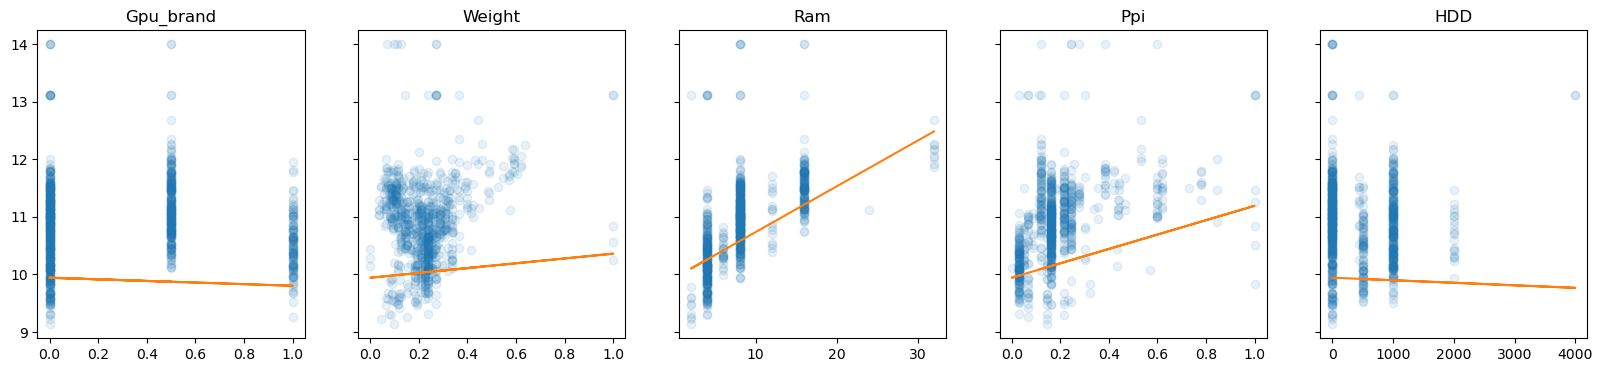

In [58]:
f, axs = plt.subplots(1, len(features), sharey = True, figsize = (20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [59]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [60]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [61]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 0.3609336311799977
Test: 0.3696381037544886

RMSE:
Train: 0.5292137974757245
Test: 0.5307992572651729


### Analisis de error

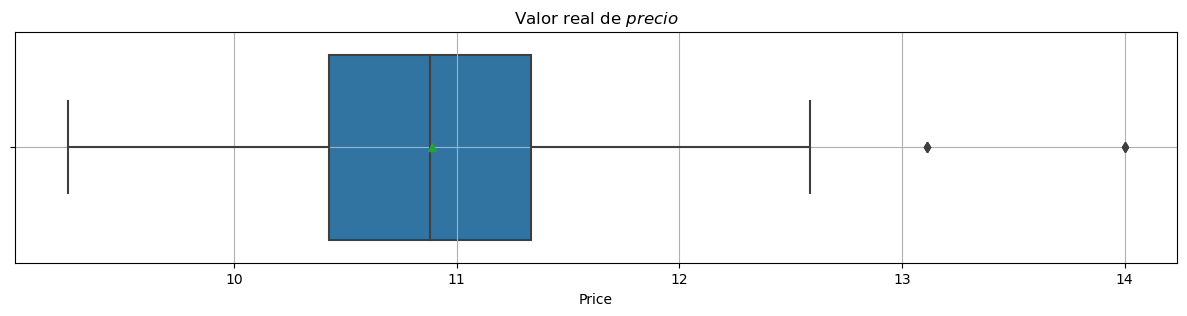

In [62]:
plt.figure(figsize = (15, 3))
sns.boxplot(x = y_test, showmeans = True, orient = 'h')
plt.title('Valor real de $\t{precio}$')
plt.grid()
plt.show()

In [63]:
y_test.describe()

count    363.000000
mean      10.888005
std        0.692378
min        9.253676
25%       10.426796
50%       10.882316
75%       11.333734
max       14.000000
Name: Price, dtype: float64

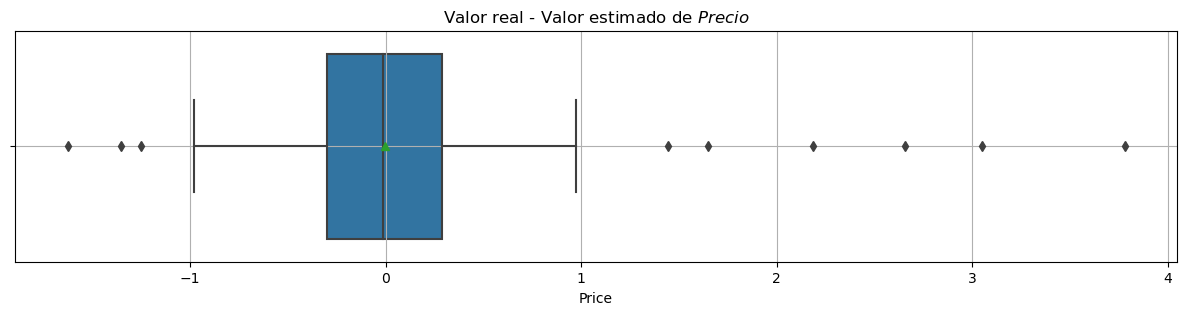

In [64]:
plt.figure(figsize = (15, 3))
sns.boxplot(x = (y_test - regression.predict(X_test)), showmeans = True, orient = 'h')
plt.title('Valor real - Valor estimado de $\t{Precio}$')
plt.grid()
plt.show()

In [65]:
abs(y_test - regression.predict(X_test)).describe()

count    363.000000
mean       0.369638
std        0.381466
min        0.000300
25%        0.145500
50%        0.293254
75%        0.494902
max        3.779291
Name: Price, dtype: float64

# 5. Validacion supuestos de regresion

### 5.1. Colinealidad
Es necesario que las columnas utilizadas no tengan (o tengan muy poca) colinealidad (correlación).

<Axes: >

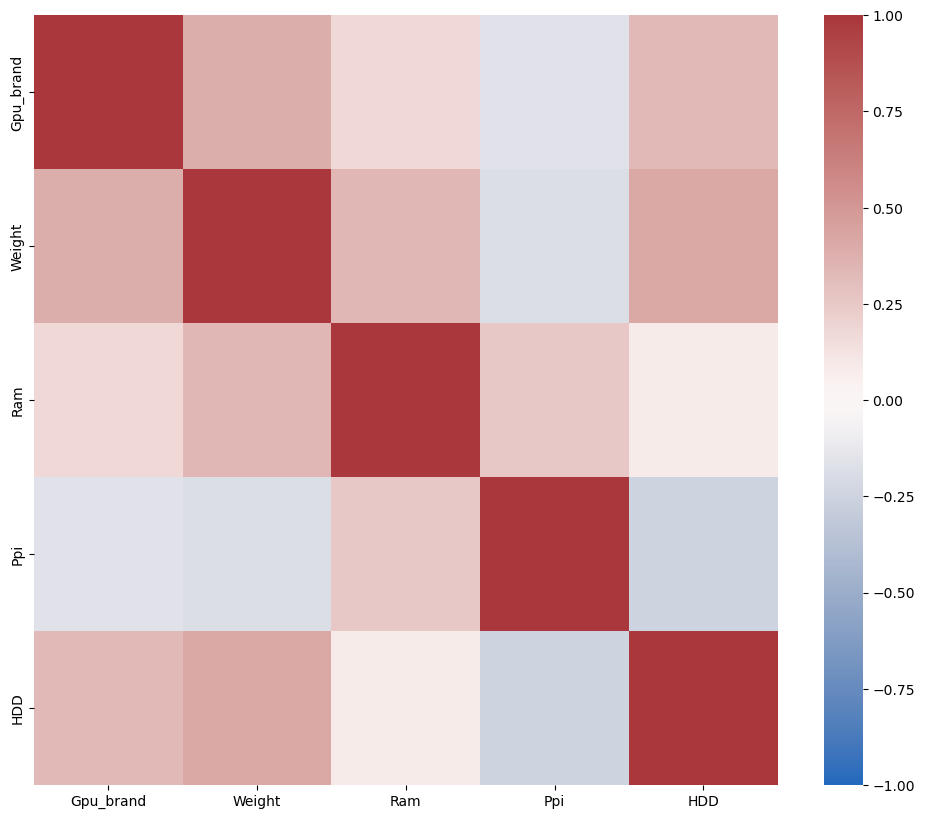

In [66]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_pc[features].corr(), cmap = 'vlag', vmin = -1, vmax = 1)

In [93]:
X_train[features].corr()

,Gpu_brand,Weight,Ram,Ppi,HDD
Gpu_brand,1.000000,0.419532,0.188495,-0.185210,0.353479
Weight,0.419532,1.000000,0.371203,-0.217883,0.456949
Ram,0.188495,0.371203,1.000000,0.221512,0.128308
Ppi,-0.185210,-0.217883,0.221512,1.000000,-0.265129
HDD,0.353479,0.456949,0.128308,-0.265129,1.000000


Para este caso, se puede evidenciar luego de haber revisado todos los valores de correlacion entre las variables, apartyir de  la recomendacion de eliminar los valores superiores 90 %, se puee llegar a decir que no se debe tocar por ahora nigun valor. En este caso, se puede decir que las variables escogidas, tiene poco nivel de correlacion, es decir, se puede tomar en cuenta, por ahora para el analisis de los valores.  

In [94]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_})

,columns,coef
0,Gpu_brand,-0.011080
1,Weight,-0.004636
2,Ram,0.407616
3,Ppi,0.146724
4,HDD,-0.053124


Ahora bien, para este caso al no quitar nigun tipo dato o de las variables seleccionadas, no se consiero quese deberia agregar una modificaion a la piepline. Esto , por el razonamiento de colinealdiad, ademas. En este caso, al analizar se puede encontrar varias afirmaciones si se quiere pensar sobre los coeficientes que se estan tomando en este punto. Para este caso, podemo encotrar, lo primero es una pequeña idea de dominancia en cuanto algunos de estos coeficientes. En primer lugar, tenemos la ram, la cual como se ve pude llegar a manejar de mejorar manera los precios segun sus valores unicos. Luego tenemos el mismo caso en menor medida en la columna Ppi. Lo mimos sucede para el caso de la Gpu_brand. Lo mismo para el caso de HDD. Sin embargo, podemos notar primero, que el coeficiente Weigth, se encuentra un poco en desbalanze con respecto al resto. Lo que genera fallas como el caso de Ppi. Luego, el caso mas particular de este analsisi, seria el coeficiente llamado weight. EL cual, como se puede ver, puede generar mucha variedad de resultaods, ademas de ser el mas desbalanceado en cuanto a ser el valor mas insignifictante del modelo.

### 5.2. Linealidad
Es necesario que la relación entre cada variable de entrada y la varable objetivo sea lineal.

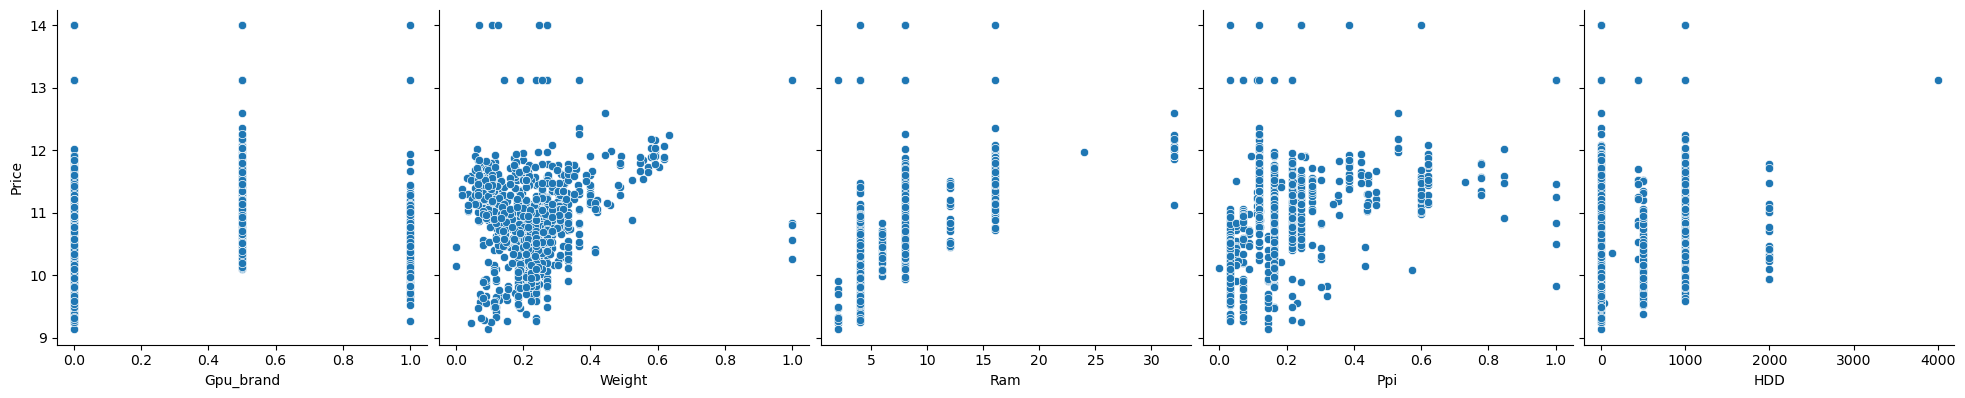

In [68]:
sns.pairplot(df_pc.sample(1000), height = 4, y_vars = 'Price', x_vars = features, kind = 'scatter')

In [69]:
pipeline = Pipeline(
    [
        
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [70]:
pipeline.fit(X_train[features], y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [71]:
pd.DataFrame({"columns": pipeline["poly"].get_feature_names_out(), "coef": pipeline["model"].coef_})

,columns,coef
0,Gpu_brand,0.239514
1,Weight,0.046086
2,Ram,0.734004
3,Ppi,0.396385
4,HDD,-0.234266
5,Gpu_brand^2,-0.214188
6,Gpu_brand Weight,-0.097795
7,Gpu_brand Ram,-0.007483
8,Gpu_brand Ppi,-0.026032
9,Gpu_brand HDD,0.052455


In [72]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[features])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[features])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[features]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[features]))))

MAE:
Train: 0.32455158836309
Test: 0.32920804047352115

RMSE:
Train: 0.4783689549638655
Test: 0.508674277674285


### 5.2 Normalidad de los errores

In [73]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)


In [74]:
pipeline.fit(X_train[features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [75]:
errors = (pipeline.predict(X_train[features])-y_train).values

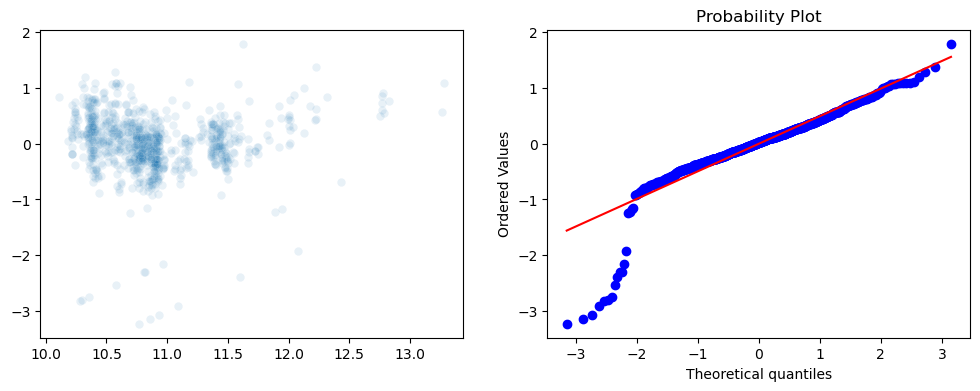

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[features]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

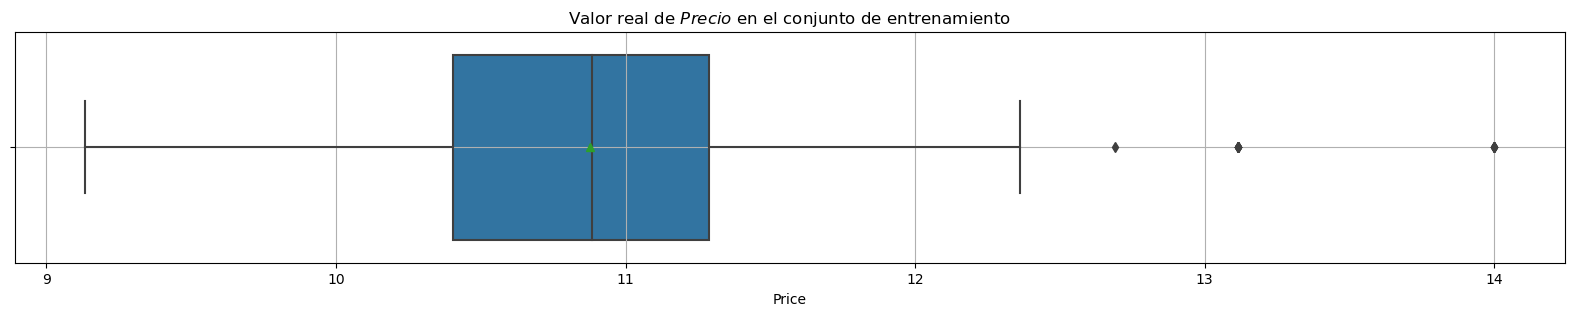

In [77]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_train, showmeans=True, orient="h")
plt.title("Valor real de $\t{Precio}$ en el conjunto de entrenamiento")
plt.grid()
plt.show()

Para determinar los valores atípicos a remover se puede aplicar la regla $$outlier > Q3 + 1.5*IQR$$

In [78]:
q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3-q1
threshold = q3+1.5*iqr
threshold

12.61563259011088

In [79]:
y_train = y_train.loc[y_train <= threshold]
X_train = X_train.loc[y_train.index]

In [80]:
y_test = y_test.loc[y_test <= threshold]
X_test = X_test.loc[y_test.index]

In [81]:
pipeline.fit(X_train[features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [82]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_})

,columns,coef
0,Gpu_brand,-0.011080
1,Weight,-0.004636
2,Ram,0.407616
3,Ppi,0.146724
4,HDD,-0.053124


In [83]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[features])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[features])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[features]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[features]))))

MAE:
Train: 0.32010482568633253
Test: 0.33619205389245566

RMSE:
Train: 0.4038865396917241
Test: 0.4224427532278511


In [84]:
errors = (pipeline.predict(X_train[features])-y_train).values

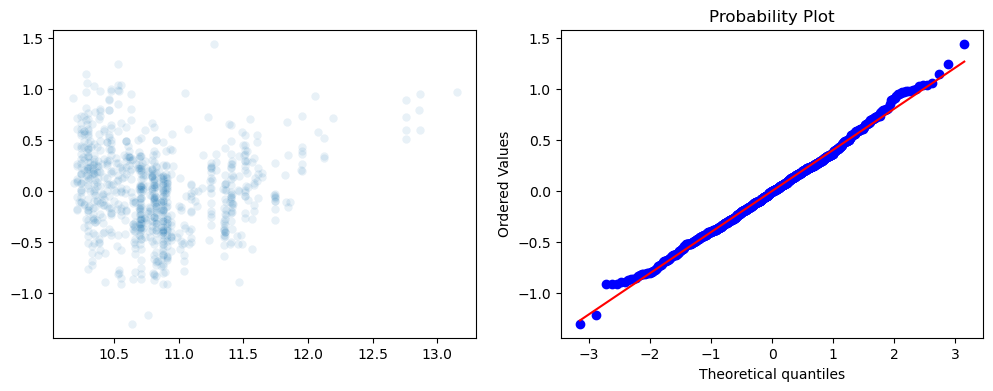

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[features]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

### Varianza constante

<Axes: >

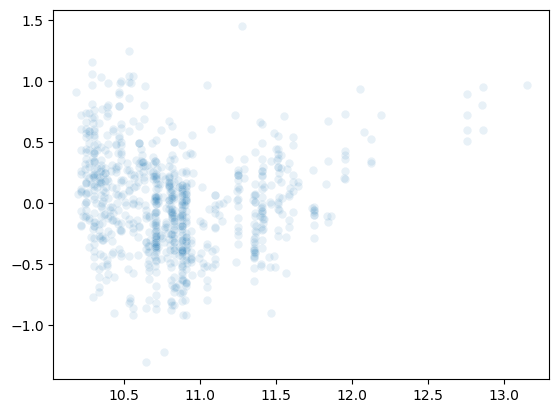

In [86]:
sns.scatterplot(x = pipeline.predict(X_train[features]), y=errors, alpha=0.1)

# 6. Persistencia de Modelo

In [87]:
filename = "model.joblib"

In [88]:
dump(pipeline, filename)

['model.joblib']

In [89]:
pipeline_loaded = load(filename)

In [90]:
df_pc['Price'] = pipeline_loaded.predict(df_pc[features])

<Axes: xlabel='Price', ylabel='Count'>

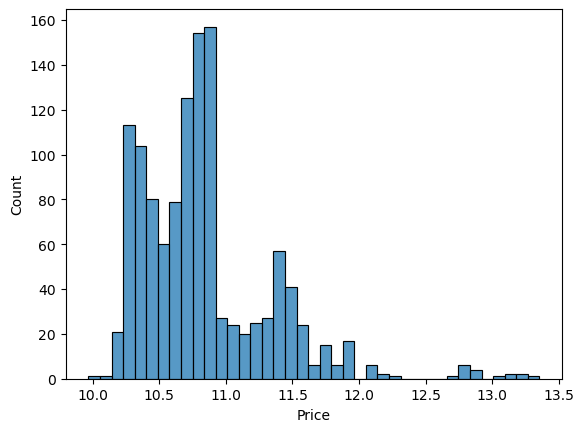

In [91]:
sns.histplot(df_pc['Price'])